## Gig Economy Project

By: Janet Taylor & Evan Kessler

Workers in the gig economy (i.e., Uber, GrubHub, TaskRabbit, etc.) depend on the reviews they get to continue working on the platform. Workers on those platforms are often affected by receiving negative reviews that describe elements that were not under their control. The project explores how the analysis of online reviews can detect when unfair reviews are left to workers and identify the type of unfair review that was left.

In [17]:
import pandas as pd

In [18]:
uber = pd.read_csv("uber_cleaned.csv")
lyft = pd.read_csv("lyft_cleaned.csv")
uber['Rating_Scaled'] = (uber['Rating'] - 3) / 2
lyft['Rating_Scaled'] = (uber['Rating'] - 3) / 2
pd.options.display.max_colwidth = 500
uber["Review Body"].head()

0    all your driver's we very good, knowledgeable and friendly. however, ellie was exceptional. she established a rapport with my daughter and i in the very short time we were in the car with her. she was helpful, answered our questions about the island and even gave us a few suggestions on places she enjoyed eating. which in fact we did try freda's and it was good. thank you, ellie, for your service, customer service and helpfulness!
1                                                                                                                                                                driver canceled the ride because he couldn’t find us and we were charged $5.  we were waiting for him but he didn’t show up.  when i tried contacting him, i went directly into voicemail but couldn’t leave a message.  had to order another ride and the second driver picked us up.
2                                                                                                                       

In [19]:
uber.columns

uber['Review Body']

0                                                                        all your driver's we very good, knowledgeable and friendly. however, ellie was exceptional. she established a rapport with my daughter and i in the very short time we were in the car with her. she was helpful, answered our questions about the island and even gave us a few suggestions on places she enjoyed eating. which in fact we did try freda's and it was good. thank you, ellie, for your service, customer service and helpfulness!
1                                                                                                                                                                                                                                    driver canceled the ride because he couldn’t find us and we were charged $5.  we were waiting for him but he didn’t show up.  when i tried contacting him, i went directly into voicemail but couldn’t leave a message.  had to order another ride and the second drive

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evkes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 words with highest weighted averages:
awesome: 0.62
excellent: 0.58
wonderful: 0.57
pleasant: 0.50
enjoyed: 0.49
great: 0.47
courteous: 0.46
perfect: 0.44
nice: 0.44
conversation: 0.44
personable: 0.43
knowledgeable: 0.42
respectful: 0.41
comfortable: 0.41
prompt: 0.41
clean: 0.41
safely: 0.39
safe: 0.39
timely: 0.39
friendly: 0.39

Bottom 20 words with lowest weighted averages:
stuck: -0.15
background: -0.15
useless: -0.15
rude: -0.16
mistake: -0.17
wrong: -0.17
disappointed: -0.17
stupid: -0.19
crap: -0.20
cold: -0.20
bad: -0.21
impossible: -0.23
disgusting: -0.26
disgusted: -0.28
terrible: -0.28
horrible: -0.29
worst: -0.30
shocking: -0.30
awful: -0.32
pathetic: -0.33


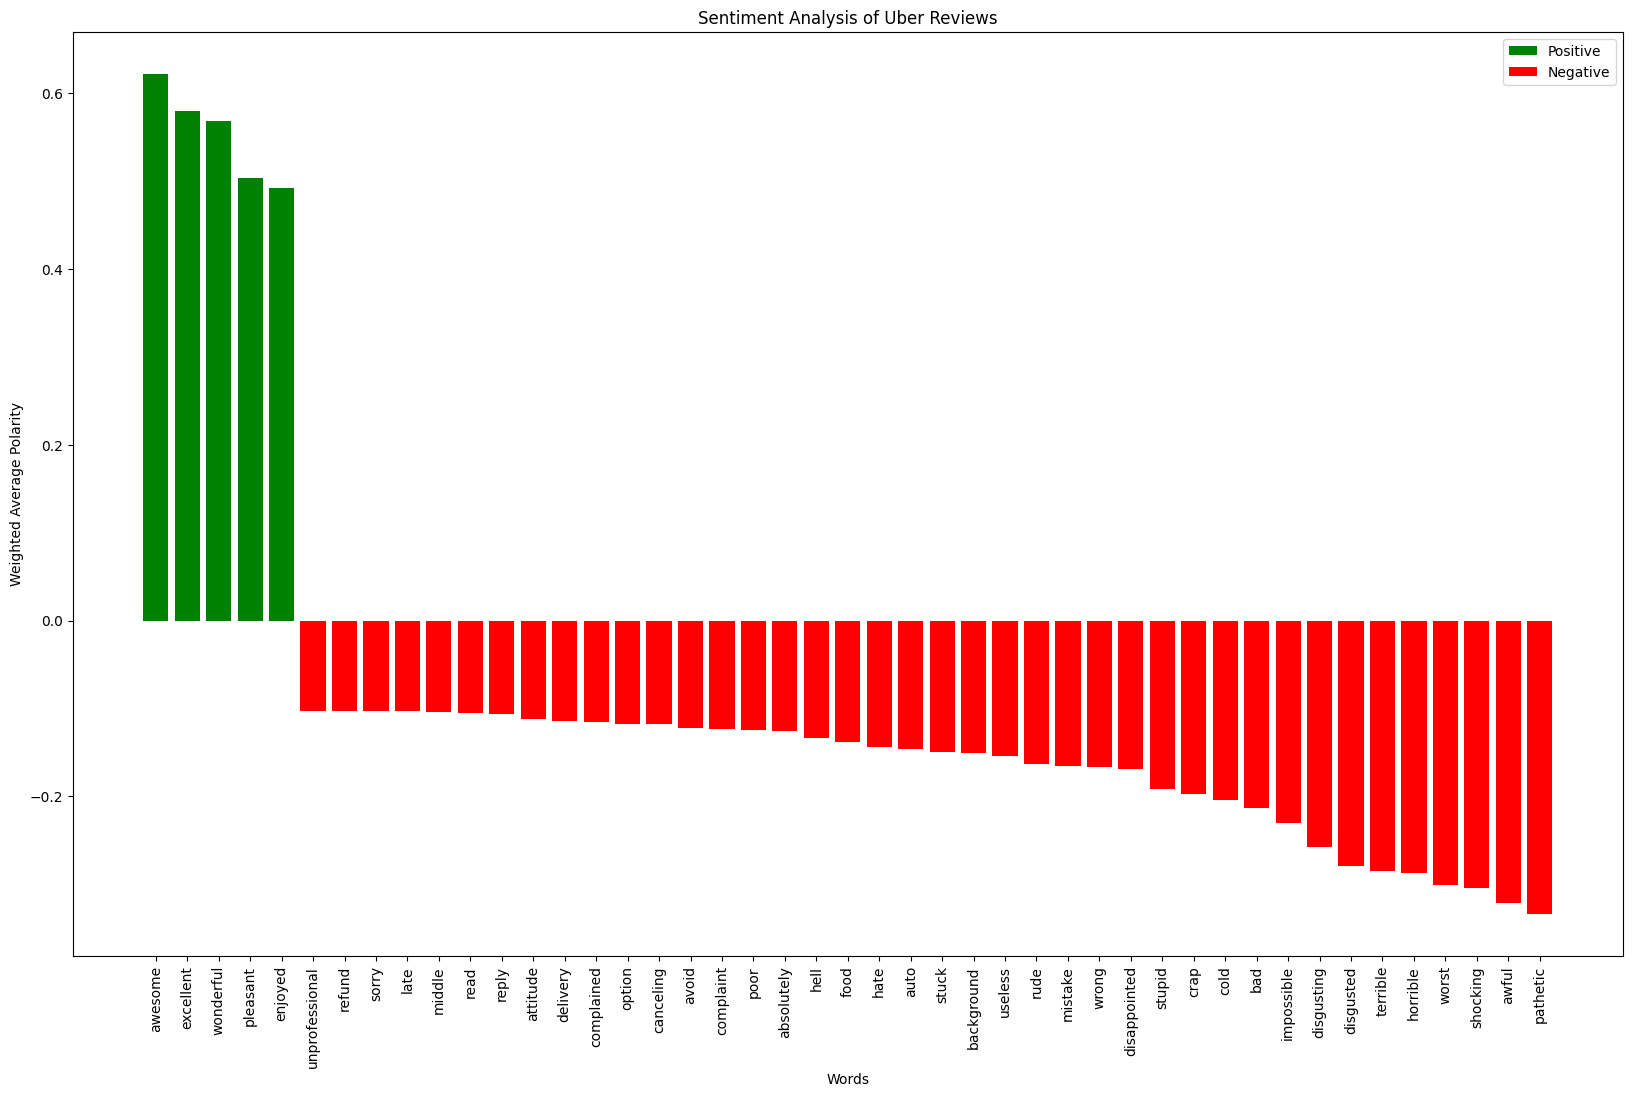

In [20]:
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
import pandas as pd
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

translator = str.maketrans('', '', string.punctuation)
reviews = [review.translate(translator) for review in uber['Review Body']]

sentiment = {}
for review in reviews:
    blob = TextBlob(review)
    for word in blob.words:
        word = word.lower()
        if word not in stop_words and len(word) > 2:
            if word not in sentiment:
                sentiment[word] = [blob.sentiment.polarity, 1]
            else:
                sentiment[word][0] += blob.sentiment.polarity
                sentiment[word][1] += 1

weighted_avg_dict = {}
for word, (sentiment_sum, count) in sentiment.items():
    if count > 20:
        weighted_avg_dict[word] = sentiment_sum / count

sorted_words = sorted(weighted_avg_dict.items(), key=lambda x: x[1], reverse=True)
top_words = [word for word, avg in sorted_words if avg > 0][:20]
bottom_words = [word for word, avg in sorted_words if avg < 0][:20]

print("Top 20 words with highest weighted averages:")
for word, avg in sorted_words[:20]:
    print(f"{word}: {avg:.2f}")

print("\nBottom 20 words with lowest weighted averages:")
for word, avg in sorted_words[-20:]:
    print(f"{word}: {avg:.2f}")

top_words = sorted_words[:5]
bottom_words = sorted_words[-40:]

top_words_list = [word for word, avg in top_words]
top_sentiments_list = [avg for word, avg in top_words]
bottom_words_list = [word for word, avg in bottom_words]
bottom_sentiments_list = [avg for word, avg in bottom_words]

# Create a bar chart with the top and bottom 20 words and their sentiment values
plt.figure(figsize=(20, 12))
plt.bar(top_words_list, top_sentiments_list, color='green')
plt.bar(bottom_words_list, bottom_sentiments_list, color='red')
plt.title("Sentiment Analysis of Uber Reviews")
plt.xlabel("Words")
plt.ylabel("Weighted Average Polarity")
plt.xticks(rotation=90)
plt.legend(["Positive", "Negative"])
plt.show()
